In [97]:
import pandas as pd
import re
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt

In [98]:
#step input atau membaca file yang akan di cleansing
data_df = pd.read_csv('data.csv', encoding='latin-1')
kamusalay_df = pd.read_csv('new_kamusalay.csv', encoding='latin-1')
abusive_df = pd.read_csv('abusive.csv', encoding='latin-1')

In [99]:
#output file data.csv
data_df

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13164,USER jangan asal ngomong ndasmu. congor lu yg ...,1,1,1,0,0,0,1,0,0,1,0,0
13165,USER Kasur mana enak kunyuk',0,1,0,0,0,0,0,0,0,0,0,0
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,0,0,0,0,0,0,0,0,0,0,0,0
13167,USER USER USER USER Bom yang real mudah terdet...,0,0,0,0,0,0,0,0,0,0,0,0


In [100]:
#output file new_kamusalay.csv
kamusalay_df

,anakjakartaasikasik,anak jakarta asyik asyik
0,pakcikdahtua,pak cik sudah tua
1,pakcikmudalagi,pak cik muda lagi
2,t3tapjokowi,tetap jokowi
3,3x,tiga kali
4,aamiin,amin
...,...,...
15161,mendikbud,menteri pendidikan dan kebudayaan
15162,mendag,menteri perdagangan
15163,menaker,menteri tenaga kerja
15164,memetwit,mentwit


In [101]:
#output file abusive.csv
abusive_df

,ABUSIVE
0,alay
1,ampas
2,buta
3,keparat
4,anjing
...,...
120,rezim
121,sange
122,serbet
123,sipit


In [102]:
#menampilkan 5 row data teratas dari file data.csv
data_df.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0


In [103]:
#menampilkan 5 row data terbawah dari file data.csv
data_df.tail()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
13164,USER jangan asal ngomong ndasmu. congor lu yg ...,1,1,1,0,0,0,1,0,0,1,0,0
13165,USER Kasur mana enak kunyuk',0,1,0,0,0,0,0,0,0,0,0,0
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,0,0,0,0,0,0,0,0,0,0,0,0
13167,USER USER USER USER Bom yang real mudah terdet...,0,0,0,0,0,0,0,0,0,0,0,0
13168,"USER Mana situ ngasih("": itu cuma foto ya kuti...",1,1,1,0,0,0,0,0,1,1,0,0


In [104]:
#menampilkan informasi yang terdapat di dataframe data.csv
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13169 entries, 0 to 13168
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet          13169 non-null  object
 1   HS             13169 non-null  int64 
 2   Abusive        13169 non-null  int64 
 3   HS_Individual  13169 non-null  int64 
 4   HS_Group       13169 non-null  int64 
 5   HS_Religion    13169 non-null  int64 
 6   HS_Race        13169 non-null  int64 
 7   HS_Physical    13169 non-null  int64 
 8   HS_Gender      13169 non-null  int64 
 9   HS_Other       13169 non-null  int64 
 10  HS_Weak        13169 non-null  int64 
 11  HS_Moderate    13169 non-null  int64 
 12  HS_Strong      13169 non-null  int64 
dtypes: int64(12), object(1)
memory usage: 1.3+ MB


In [105]:
#menampilkan jumlah kolom dan baris yang terdapat di dataframe data.csv
data_df.shape

(13169, 13)

In [106]:
#menampilkan apakah terdapat duplikat pada dataframe data.csv
data_df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
13164    False
13165    False
13166    False
13167    False
13168    False
Length: 13169, dtype: bool

In [107]:
#menampilkan dan menjumlahkan duplikat yang ada pada dataframe data.csv
data_df.duplicated().sum()

125

In [108]:
#menghilangkan data yang duplikat pada dataframe data.csv
df = data_df.drop_duplicates()

In [109]:
#menampilkan jumlah data yang duplikat pada dataframe data.csv
df.duplicated().sum()

0

In [110]:
#output dataframe setelah dihilangkan unsur duplikat
df

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13164,USER jangan asal ngomong ndasmu. congor lu yg ...,1,1,1,0,0,0,1,0,0,1,0,0
13165,USER Kasur mana enak kunyuk',0,1,0,0,0,0,0,0,0,0,0,0
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,0,0,0,0,0,0,0,0,0,0,0,0
13167,USER USER USER USER Bom yang real mudah terdet...,0,0,0,0,0,0,0,0,0,0,0,0


In [111]:
#menampilkan apakah dataframe mengandung data missing value didalamnya
df.isna()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13164,False,False,False,False,False,False,False,False,False,False,False,False,False
13165,False,False,False,False,False,False,False,False,False,False,False,False,False
13166,False,False,False,False,False,False,False,False,False,False,False,False,False
13167,False,False,False,False,False,False,False,False,False,False,False,False,False


In [112]:
#menampilkan data yang missing value secara kolom tiap data
df.isna().sum()/df.shape[0]

Tweet            0.0
HS               0.0
Abusive          0.0
HS_Individual    0.0
HS_Group         0.0
HS_Religion      0.0
HS_Race          0.0
HS_Physical      0.0
HS_Gender        0.0
HS_Other         0.0
HS_Weak          0.0
HS_Moderate      0.0
HS_Strong        0.0
dtype: float64

In [113]:
#menambahkan kolom character untuk menghitung jumlah huruf yang ada pada tiap tweet
df['character'] = df.Tweet.apply(len)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_53972\795108840.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['character'] = df.Tweet.apply(len)


In [114]:
#menambahkan kolom word untuk menghitung jumlah kata yang ada pada tiap tweet
df['word'] = df.Tweet.apply(lambda sent: len(sent.split()))

C:\Users\ASUS\AppData\Local\Temp\ipykernel_53972\3269621341.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['word'] = df.Tweet.apply(lambda sent: len(sent.split()))


In [115]:
df

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,character,word
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0,138,25
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0,120,21
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0,254,37
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0,75,14
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0,89,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13164,USER jangan asal ngomong ndasmu. congor lu yg ...,1,1,1,0,0,0,1,0,0,1,0,0,61,10
13165,USER Kasur mana enak kunyuk',0,1,0,0,0,0,0,0,0,0,0,0,28,5
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,0,0,0,0,0,0,0,0,0,0,0,0,62,9
13167,USER USER USER USER Bom yang real mudah terdet...,0,0,0,0,0,0,0,0,0,0,0,0,135,22


In [116]:
#menampilkan rata-rata jumlah kata pada kolom word
df.word.mean()

17.264259429622815

In [117]:
#menampilkan rata-rata jumlah huruf pada kolom character
df.character.mean()

114.12434835939895

In [118]:
#membuat fungsi untuk menghilangkan simbol yang ada dan mengubah semua setiap karakter huruf menjadi karakter huruf kecil
def lowercase(sent) :
    string = sent.lower()
    string = re.sub(r'[^a-zA-Z0-9]', ' ', string)
    return string

In [119]:
#memanggil fungsi untuk menghilangkan simbol yang ada dan mengubah semua setiap karakter huruf menjadi karakter huruf kecil
df['Cleaned Tweet'] = df['Tweet'].apply(lowercase)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_53972\2281938502.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cleaned Tweet'] = df['Tweet'].apply(lowercase)


In [120]:
#output dari fungsi membuat simbol yang ada menjadi hilang dan semua karakter huruf menjadi huruf kecil
df

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,character,word,Cleaned Tweet
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0,138,25,disaat semua cowok berusaha melacak perhatia...
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0,120,21,rt user user siapa yang telat ngasih tau elu ...
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0,254,37,41 kadang aku berfikir kenapa aku tetap perc...
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0,75,14,user user aku itu aku n nku tau matamu sipit t...
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0,89,14,user user kaum cebong kapir udah keliatan dong...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13164,USER jangan asal ngomong ndasmu. congor lu yg ...,1,1,1,0,0,0,1,0,0,1,0,0,61,10,user jangan asal ngomong ndasmu congor lu yg ...
13165,USER Kasur mana enak kunyuk',0,1,0,0,0,0,0,0,0,0,0,0,28,5,user kasur mana enak kunyuk
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,0,0,0,0,0,0,0,0,0,0,0,0,62,9,user hati hati bisu g n nlagi bosan huft ...
13167,USER USER USER USER Bom yang real mudah terdet...,0,0,0,0,0,0,0,0,0,0,0,0,135,22,user user user user bom yang real mudah terdet...


<Axes: ylabel='HS'>

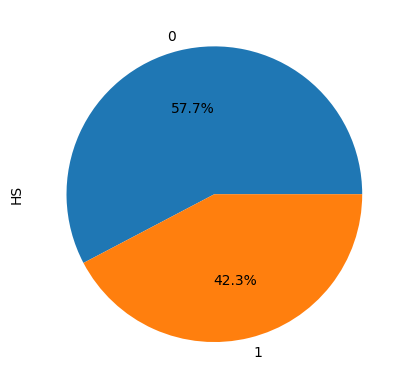

In [121]:
#membuat serta menampilkan hasil dari visualisasi pie chart pada kolom Hate Speech
df.groupby('HS').HS.count().plot(kind='pie',autopct='%1.1f%%')

In [122]:
df

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,character,word,Cleaned Tweet
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0,138,25,disaat semua cowok berusaha melacak perhatia...
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0,120,21,rt user user siapa yang telat ngasih tau elu ...
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0,254,37,41 kadang aku berfikir kenapa aku tetap perc...
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0,75,14,user user aku itu aku n nku tau matamu sipit t...
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0,89,14,user user kaum cebong kapir udah keliatan dong...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13164,USER jangan asal ngomong ndasmu. congor lu yg ...,1,1,1,0,0,0,1,0,0,1,0,0,61,10,user jangan asal ngomong ndasmu congor lu yg ...
13165,USER Kasur mana enak kunyuk',0,1,0,0,0,0,0,0,0,0,0,0,28,5,user kasur mana enak kunyuk
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,0,0,0,0,0,0,0,0,0,0,0,0,62,9,user hati hati bisu g n nlagi bosan huft ...
13167,USER USER USER USER Bom yang real mudah terdet...,0,0,0,0,0,0,0,0,0,0,0,0,135,22,user user user user bom yang real mudah terdet...


In [124]:
#proses input file stopwordbahasa.csv
stopword_df = pd.read_csv('stopwordbahasa.csv')

In [125]:
#output dari dataframe stopwordbahasa.csv
stopword_df

,ada
0,adalah
1,adanya
2,adapun
3,agak
4,agaknya
...,...
768,nih
769,wkwk
770,haha
771,eh


In [126]:
#proses import library wordcloud
from wordcloud import WordCloud

In [127]:
#proses untuk membuat kolom Tweet menjadi satu keseluruhan paragraf teks
text = ' '.join(df['Tweet'])

In [128]:
text

'- disaat semua cowok berusaha melacak perhatian gue. loe lantas remehkan perhatian yg gue kasih khusus ke elo. basic elo cowok bego ! ! !\' RT USER: USER siapa yang telat ngasih tau elu?edan sarap gue bergaul dengan cigax jifla calis sama siapa noh licew juga\' 41. Kadang aku berfikir, kenapa aku tetap percaya pada Tuhan padahal aku selalu jatuh berkali-kali. Kadang aku merasa Tuhan itu ninggalkan aku sendirian. Ketika orangtuaku berencana berpisah, ketika kakakku lebih memilih jadi Kristen. Ketika aku anak ter USER USER AKU ITU AKU\\n\\nKU TAU MATAMU SIPIT TAPI DILIAT DARI MANA ITU AKU\' USER USER Kaum cebong kapir udah keliatan dongoknya dari awal tambah dongok lagi hahahah\' USER Ya bani taplak dkk \\xf0\\x9f\\x98\\x84\\xf0\\x9f\\x98\\x84\\xf0\\x9f\\x98\\x84\' deklarasi pilkada 2018 aman dan anti hoax warga dukuh sari jabon Gue baru aja kelar re-watch Aldnoah Zero!!! paling kampret emang endingnya! 2 karakter utama cowonya kena friendzone bray! XD URL Nah admin belanja satu lagi po

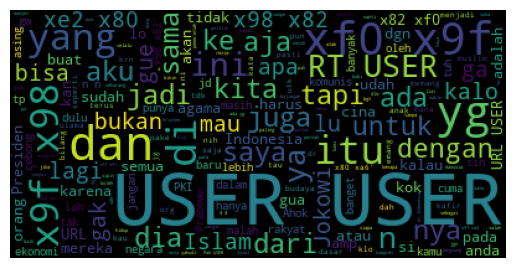

In [129]:
#proses untuk memunculkan atau memvisualisasikan kata yang sering muncul dalam kolom Tweet
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [130]:
my_array = text.split()

In [131]:
#proses untuk memfilter atau menghilangkan stopword yang ada di dalam dataframe
filtered_array = [item for item in my_array if item not in stopword_df['ada'].values]

In [132]:
filtered_text = ' '.join(filtered_array)

In [133]:
filtered_text

'- disaat cowok berusaha melacak perhatian gue. loe lantas remehkan perhatian yg kasih khusus elo. basic elo cowok bego ! ! !\' RT USER: USER telat ngasih tau elu?edan sarap bergaul cigax jifla calis noh licew juga\' 41. Kadang berfikir, percaya Tuhan jatuh berkali-kali. Kadang Tuhan ninggalkan sendirian. Ketika orangtuaku berencana berpisah, kakakku memilih Kristen. Ketika anak ter USER USER AKU ITU AKU\\n\\nKU TAU MATAMU SIPIT TAPI DILIAT DARI MANA ITU AKU\' USER USER Kaum cebong kapir udah keliatan dongoknya dongok hahahah\' USER Ya bani taplak dkk \\xf0\\x9f\\x98\\x84\\xf0\\x9f\\x98\\x84\\xf0\\x9f\\x98\\x84\' deklarasi pilkada 2018 aman anti hoax warga dukuh sari jabon Gue aja kelar re-watch Aldnoah Zero!!! kampret emang endingnya! 2 karakter utama cowonya kena friendzone bray! XD URL Nah admin belanja port terbaik nak makan Ais Kepal Milo, Ais Kepal Horlicks Cendol Toping kaw kaw. ð??\xad; ; Doket mano tu ? Gerai Rojak Mertuaku - Taipan 2 (depan TWINS BABY &amp; ROMANTIKA / Bank I

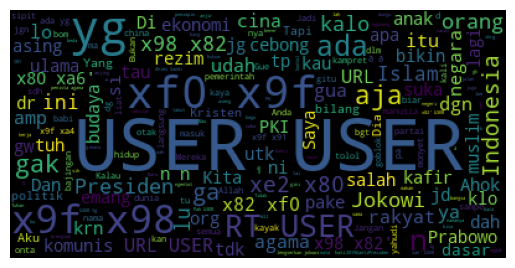

In [134]:
#proses untuk memunculkan atau memvisualisasikan kata yang sering muncul dalam kolom Tweet dengan dihilangkan stopword
wordcloud = WordCloud().generate(filtered_text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()